In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Introduction 

#### Data-information -  
This dataset contains the patients's information regarding the heart disease.

__cp__ - Chest pain type (1:typical angina, 2:atypical angine, 3: non-anginal pain and 4:asymptomatic)  
__trestbps__ - resting blood pressure (mm Hg)  
__chol__ - serun cholestrol (md/dl)  
__fbs__ - fasting blood sugar: 1 if > 120mg/dl; 0 otherwise  
__restecg__ - resting electrocardiographic result: 0=normal; 1=Having ST-T wave abnormality; 2=showing probable or definite ventricular hypertrophy   
__thalach__ - maximum heart rate achieved  
__exang__ - exercise induced angina  
__oldpeak__ - ST depression included by exercise relative to rest  
__slope__ - the slope of the peak exercise ST segment: 1= upsloping; 2=flat; 3:downslping  
__ca__ - number of major vessels coloured by flourosopy  
__thal__ - 3=normal; 6=fixed defect; 7=reversable defect  
__num__ - predicted attribute; 0=Heart disease; 1=No heart disease  

__Aim__ - To train and create a model which correctly classify unknown patients by looking at their test report whether they have heart dieases or not.

In [5]:
df = pd.read_csv("dataset/heart-disease.csv")
df.head(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  num       303 non-null    float64
dtypes: float64(14)
memory usage: 33.3 KB


### Data visualisation and analytics 

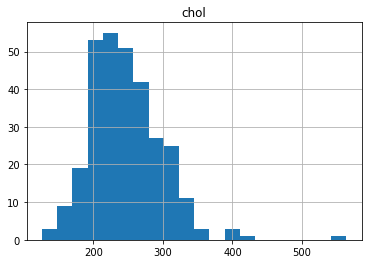

Average cholestrol of heart patients is - 251.47
Average cholestrol of Non heart patients is - 242.64


In [6]:
df.hist(column='chol', bins=20)
plt.show()

mean = df[df['num']==1]['chol'].mean()
print("Average cholestrol of heart patients is - %.2f"%(mean))
mean2 = df[df['num']==0]['chol'].mean()
print("Average cholestrol of Non heart patients is - %.2f"%(mean2))

From the above data visualisation and result, we can see that Cholestrol is not a good identicator for heart disease, because both heart disease and non heart disease patients has similar average Cholestrol

In [59]:
print("Chest pain type - heart disease")
df_hd = df[df['num']==1]['cp']
print(df_hd.value_counts())

print("Chest pain type - non heart disease")
df_hdd = df[df['num']==0]['cp']
print(df_hdd.value_counts())

Chest pain type - heart disease
4.0    105
3.0     18
2.0      9
1.0      7
Name: cp, dtype: int64
Chest pain type - non heart disease
3.0    68
2.0    41
4.0    39
1.0    16
Name: cp, dtype: int64


From the above data, we can see that heart disease patients has more asymptomic (4) type of chest pain and few non-anginal pain, whereas it is opposite for non heart disease patients. 

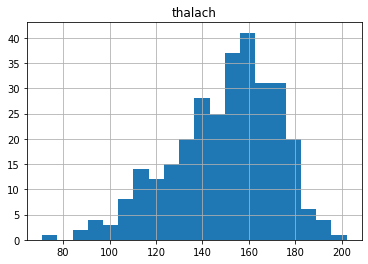

Average heart rate of a heart disease patients is 139.26
Average heart rate of a non heart disease patients is 158.38


In [52]:
positive = df[df['num'] == 1]
negative = df[df['num'] == 0]

df.hist(column="thalach", bins=20)
plt.show()
mean = positive['thalach'].mean()
mean2 = negative['thalach'].mean()

print("Average heart rate of a heart disease patients is %.2f"%(mean))
print("Average heart rate of a non heart disease patients is %.2f"%(mean2))

Therefore, non-heart disease patients has normally more heart rate than heart disease patients.

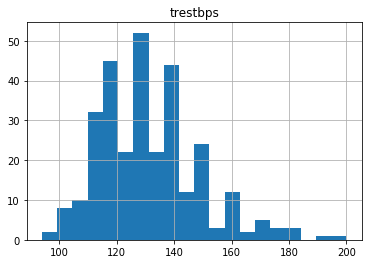

Average resting blood pressure of a heart patient - 134.57
Average resting blood pressure of non-heart disease patient - 129.25


In [53]:
df.hist(column="trestbps", bins=20)
plt.show()
mean = positive['trestbps'].mean()
mean2 = negative['trestbps'].mean()
print("Average resting blood pressure of a heart patient - %.2f"%(mean))
print("Average resting blood pressure of non-heart disease patient - %.2f"%(mean2))

In [72]:
#Patient above the age of 50 analyses

cond = (df['age']>50) & (df['num'] == 1)
df_above = df[cond]
df_below = df[~cond]

cond = (df['age']>50) & (df['num'] == 0)
df_n_above = df[cond]
df_n_below = df[~cond]

print("Heart disease patient above 50")
print("")
print(df_above['cp'].value_counts())
print("")
print("Heart disease patient below 50")
print("")
print(df_below['cp'].value_counts())
print("")
print("-----------------------------------------")
print("")
print("Non-heart disease patients above 50")
print("")
print(df_n_above['cp'].value_counts())
print("")
print("Non-heart disease patients below 50")
print("")
print(df_n_below['cp'].value_counts())

Heart disease patient above 50

4.0    84
3.0    13
2.0     8
1.0     5
Name: cp, dtype: int64

Heart disease patient below 50

3.0    73
4.0    60
2.0    42
1.0    18
Name: cp, dtype: int64

-----------------------------------------

Non-heart disease patients above 50

3.0    42
4.0    25
2.0    19
1.0    13
Name: cp, dtype: int64

Non-heart disease patients below 50

4.0    119
3.0     44
2.0     31
1.0     10
Name: cp, dtype: int64


Another fair indicator of diabetes.

### Preparation for model training and creation

In [73]:
cols = df.columns
cols = cols[0:len(cols)-1]
X = df[cols].values # Features #  2D Array for machine learning algorithms
y = df['num'].values # Class 

#### Dividing data into train and test

In [74]:
from sklearn.model_selection import train_test_split

xlearn, xtest, ylearn, ytest = train_test_split(X, y, test_size=0.2, random_state=4)
print("Learning data - {} rows | Testing data - {} rows".format(xlearn.shape[0], xtest.shape[0]))

Learning data - 242 rows | Testing data - 61 rows


#### Fitting the model

In this case, we will be using K-Nearest Neighbour algorithm to train our classifer. In this algorithm, the unknown data point is classified by comparing it with K-Nearest neighbours and selecting the most occuring class.

In [75]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3).fit(xlearn, ylearn)
y_hat = model.predict(xtest)

print(y_hat[0:10])
print(ytest[0:10])

[1. 0. 0. 0. 1. 1. 0. 0. 0. 1.]
[1. 0. 0. 0. 1. 1. 1. 0. 0. 1.]


#### Accuracy of our classifier

In [76]:
import sklearn.metrics as metrics

print("Accuracy of the model on training data : {}".format(metrics.accuracy_score(ylearn, model.predict(xlearn))))
print("Accuracy of the model on testing data : {}".format(metrics.accuracy_score(ytest, y_hat)))

Accuracy of the model on training data : 0.8471074380165289
Accuracy of the model on testing data : 0.8688524590163934


In [83]:
import sklearn.svm as svm
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

svm_model = svm.SVC()
svm_model.fit(xlearn, ylearn)
y_hat2 = model.predict(xtest)


print("Accuracy of the model on training data : %.2f"%(accuracy_score(ylearn, svm_model.predict(xlearn))))
print("Accuracy of the model on test data : %.2f"%(accuracy_score(ytest, y_hat2)))
print("F1-score : %.2f"%(f1_score(ytest, y_hat2)))
print("Precision score : %.2f"%(precision_score(ytest, y_hat2)))
print("Recall score : %.2f"%(recall_score(ytest, y_hat2)))

Accuracy of the model on training data : 0.55
Accuracy of the model on test data : 0.87
F1-score : 0.86
Precision score : 0.89
Recall score : 0.83


From the above data, we can see that our model 86% accurately identify unknown objects